# Harry Potter bullet screen analysis - Tencent Video

analysis about bullet screen from the movie *Harry Potter and the Sorcerer's Stone* on video website Tencent Video

In [45]:
import pandas as pd
import requests
import json
import jieba #中文分词
import matplotlib.pyplot as plt
import numpy as np
from jieba import analyse

## 弹幕获取 Bullet screen extraction

In [46]:
# https://dm.video.qq.com/barrage/segment/n0020tf41bn/t/1627910234/0/30000/041902a_1656604194
danmu_template = "https://dm.video.qq.com/barrage/segment/n0020tf41bn/"

In [47]:
# obtained form https://dm.video.qq.com/barrage/base/n0020tf41bn
qq_time_dic = {"0":{"segment_start":"0","segment_name":"t/1627910234/0/30000/041902a_1656604194"},"30000":{"segment_start":"30000","segment_name":"t/1627910234/30000/60000/041902a_1656604194"},"60000":{"segment_start":"60000","segment_name":"t/1627910234/60000/90000/041902a_1656604194"},"90000":{"segment_start":"90000","segment_name":"t/1627910234/90000/120000/041902a_1656604194"},"120000":{"segment_start":"120000","segment_name":"t/1627910234/120000/150000/041902a_1656604194"},"150000":{"segment_start":"150000","segment_name":"t/1627910234/150000/180000/041902a_1656604194"},"180000":{"segment_start":"180000","segment_name":"t/1627910234/180000/210000/041902a_1656604194"},"210000":{"segment_start":"210000","segment_name":"t/1627910234/210000/240000/041902a_1656604194"},"240000":{"segment_start":"240000","segment_name":"t/1627910234/240000/270000/041902a_1656604194"},"270000":{"segment_start":"270000","segment_name":"t/1627910234/270000/300000/041902a_1656604194"},"300000":{"segment_start":"300000","segment_name":"t/1627910234/300000/330000/041902a_1656604194"},"330000":{"segment_start":"330000","segment_name":"t/1627910234/330000/360000/041902a_1656604194"},"360000":{"segment_start":"360000","segment_name":"t/1627910234/360000/390000/041902a_1656604194"},"390000":{"segment_start":"390000","segment_name":"t/1627910234/390000/420000/041902a_1656604194"},"420000":{"segment_start":"420000","segment_name":"t/1627910234/420000/450000/041902a_1656604194"},"450000":{"segment_start":"450000","segment_name":"t/1627910234/450000/480000/041902a_1656604194"},"480000":{"segment_start":"480000","segment_name":"t/1627910234/480000/510000/041902a_1656604194"},"510000":{"segment_start":"510000","segment_name":"t/1627910234/510000/540000/041902a_1656604194"},"540000":{"segment_start":"540000","segment_name":"t/1627910234/540000/570000/041902a_1656604194"},"570000":{"segment_start":"570000","segment_name":"t/1627910234/570000/600000/041902a_1656604194"},"600000":{"segment_start":"600000","segment_name":"t/1627910234/600000/630000/041902a_1656604194"},"630000":{"segment_start":"630000","segment_name":"t/1627910234/630000/660000/041902a_1656604194"},"660000":{"segment_start":"660000","segment_name":"t/1627910234/660000/690000/041902a_1656604194"},"690000":{"segment_start":"690000","segment_name":"t/1627910234/690000/720000/041902a_1656604194"},"720000":{"segment_start":"720000","segment_name":"t/1627910234/720000/750000/041902a_1656604194"},"750000":{"segment_start":"750000","segment_name":"t/1627910234/750000/780000/041902a_1656604194"},"780000":{"segment_start":"780000","segment_name":"t/1627910234/780000/810000/041902a_1656604194"},"810000":{"segment_start":"810000","segment_name":"t/1627910234/810000/840000/041902a_1656604194"},"840000":{"segment_start":"840000","segment_name":"t/1627910234/840000/870000/041902a_1656604194"},"870000":{"segment_start":"870000","segment_name":"t/1627910234/870000/900000/041902a_1656604194"},"900000":{"segment_start":"900000","segment_name":"t/1627910234/900000/930000/041902a_1656604194"},"930000":{"segment_start":"930000","segment_name":"t/1627910234/930000/960000/041902a_1656604194"},"960000":{"segment_start":"960000","segment_name":"t/1627910234/960000/990000/041902a_1656604194"},"990000":{"segment_start":"990000","segment_name":"t/1627910234/990000/1020000/041902a_1656604194"},"1020000":{"segment_start":"1020000","segment_name":"t/1627910234/1020000/1050000/041902a_1656604194"},"1050000":{"segment_start":"1050000","segment_name":"t/1627910234/1050000/1080000/041902a_1656604194"},"1080000":{"segment_start":"1080000","segment_name":"t/1627910234/1080000/1110000/041902a_1656604194"},"1110000":{"segment_start":"1110000","segment_name":"t/1627910234/1110000/1140000/041902a_1656604194"},"1140000":{"segment_start":"1140000","segment_name":"t/1627910234/1140000/1170000/041902a_1656604194"},"1170000":{"segment_start":"1170000","segment_name":"t/1627910234/1170000/1200000/041902a_1656604194"},"1200000":{"segment_start":"1200000","segment_name":"t/1627910234/1200000/1230000/041902a_1656604194"},"1230000":{"segment_start":"1230000","segment_name":"t/1627910234/1230000/1260000/041902a_1656604194"},"1260000":{"segment_start":"1260000","segment_name":"t/1627910234/1260000/1290000/041902a_1656604194"},"1290000":{"segment_start":"1290000","segment_name":"t/1627910234/1290000/1320000/041902a_1656604194"},"1320000":{"segment_start":"1320000","segment_name":"t/1627910234/1320000/1350000/041902a_1656604194"},"1350000":{"segment_start":"1350000","segment_name":"t/1627910234/1350000/1380000/041902a_1656604194"},"1380000":{"segment_start":"1380000","segment_name":"t/1627910234/1380000/1410000/041902a_1656604194"},"1410000":{"segment_start":"1410000","segment_name":"t/1627910234/1410000/1440000/041902a_1656604194"},"1440000":{"segment_start":"1440000","segment_name":"t/1627910234/1440000/1470000/041902a_1656604194"},"1470000":{"segment_start":"1470000","segment_name":"t/1627910234/1470000/1500000/041902a_1656604194"},"1500000":{"segment_start":"1500000","segment_name":"t/1627910234/1500000/1530000/041902a_1656604194"},"1530000":{"segment_start":"1530000","segment_name":"t/1627910234/1530000/1560000/041902a_1656604194"},"1560000":{"segment_start":"1560000","segment_name":"t/1627910234/1560000/1590000/041902a_1656604194"},"1590000":{"segment_start":"1590000","segment_name":"t/1627910234/1590000/1620000/041902a_1656604194"},"1620000":{"segment_start":"1620000","segment_name":"t/1627910234/1620000/1650000/041902a_1656604194"},"1650000":{"segment_start":"1650000","segment_name":"t/1627910234/1650000/1680000/041902a_1656604194"},"1680000":{"segment_start":"1680000","segment_name":"t/1627910234/1680000/1710000/041902a_1656604194"},"1710000":{"segment_start":"1710000","segment_name":"t/1627910234/1710000/1740000/041902a_1656604194"},"1740000":{"segment_start":"1740000","segment_name":"t/1627910234/1740000/1770000/041902a_1656604194"},"1770000":{"segment_start":"1770000","segment_name":"t/1627910234/1770000/1800000/041902a_1656604194"},"1800000":{"segment_start":"1800000","segment_name":"t/1627910234/1800000/1830000/041902a_1656604194"},"1830000":{"segment_start":"1830000","segment_name":"t/1627910234/1830000/1860000/041902a_1656604194"},"1860000":{"segment_start":"1860000","segment_name":"t/1627910234/1860000/1890000/041902a_1656604194"},"1890000":{"segment_start":"1890000","segment_name":"t/1627910234/1890000/1920000/041902a_1656604194"},"1920000":{"segment_start":"1920000","segment_name":"t/1627910234/1920000/1950000/041902a_1656604194"},"1950000":{"segment_start":"1950000","segment_name":"t/1627910234/1950000/1980000/041902a_1656604194"},"1980000":{"segment_start":"1980000","segment_name":"t/1627910234/1980000/2010000/041902a_1656604194"},"2010000":{"segment_start":"2010000","segment_name":"t/1627910234/2010000/2040000/041902a_1656604194"},"2040000":{"segment_start":"2040000","segment_name":"t/1627910234/2040000/2070000/041902a_1656604194"},"2070000":{"segment_start":"2070000","segment_name":"t/1627910234/2070000/2100000/041902a_1656604194"},"2100000":{"segment_start":"2100000","segment_name":"t/1627910234/2100000/2130000/041902a_1656604194"},"2130000":{"segment_start":"2130000","segment_name":"t/1627910234/2130000/2160000/041902a_1656604194"},"2160000":{"segment_start":"2160000","segment_name":"t/1627910234/2160000/2190000/041902a_1656604194"},"2190000":{"segment_start":"2190000","segment_name":"t/1627910234/2190000/2220000/041902a_1656604194"},"2220000":{"segment_start":"2220000","segment_name":"t/1627910234/2220000/2250000/041902a_1656604194"},"2250000":{"segment_start":"2250000","segment_name":"t/1627910234/2250000/2280000/041902a_1656604194"},"2280000":{"segment_start":"2280000","segment_name":"t/1627910234/2280000/2310000/041902a_1656604194"},"2310000":{"segment_start":"2310000","segment_name":"t/1627910234/2310000/2340000/041902a_1656604194"},"2340000":{"segment_start":"2340000","segment_name":"t/1627910234/2340000/2370000/041902a_1656604194"},"2370000":{"segment_start":"2370000","segment_name":"t/1627910234/2370000/2400000/041902a_1656604194"},"2400000":{"segment_start":"2400000","segment_name":"t/1627910234/2400000/2430000/041902a_1656604194"},"2430000":{"segment_start":"2430000","segment_name":"t/1627910234/2430000/2460000/041902a_1656604194"},"2460000":{"segment_start":"2460000","segment_name":"t/1627910234/2460000/2490000/041902a_1656604194"},"2490000":{"segment_start":"2490000","segment_name":"t/1627910234/2490000/2520000/041902a_1656604194"},"2520000":{"segment_start":"2520000","segment_name":"t/1627910234/2520000/2550000/041902a_1656604194"},"2550000":{"segment_start":"2550000","segment_name":"t/1627910234/2550000/2580000/041902a_1656604194"},"2580000":{"segment_start":"2580000","segment_name":"t/1627910234/2580000/2610000/041902a_1656604194"},"2610000":{"segment_start":"2610000","segment_name":"t/1627910234/2610000/2640000/041902a_1656604194"},"2640000":{"segment_start":"2640000","segment_name":"t/1627910234/2640000/2670000/041902a_1656604194"},"2670000":{"segment_start":"2670000","segment_name":"t/1627910234/2670000/2700000/041902a_1656604194"},"2700000":{"segment_start":"2700000","segment_name":"t/1627910234/2700000/2730000/041902a_1656604194"},"2730000":{"segment_start":"2730000","segment_name":"t/1627910234/2730000/2760000/041902a_1656604194"},"2760000":{"segment_start":"2760000","segment_name":"t/1627910234/2760000/2790000/041902a_1656604194"},"2790000":{"segment_start":"2790000","segment_name":"t/1627910234/2790000/2820000/041902a_1656604194"},"2820000":{"segment_start":"2820000","segment_name":"t/1627910234/2820000/2850000/041902a_1656604194"},"2850000":{"segment_start":"2850000","segment_name":"t/1627910234/2850000/2880000/041902a_1656604194"},"2880000":{"segment_start":"2880000","segment_name":"t/1627910234/2880000/2910000/041902a_1656604194"},"2910000":{"segment_start":"2910000","segment_name":"t/1627910234/2910000/2940000/041902a_1656604194"},"2940000":{"segment_start":"2940000","segment_name":"t/1627910234/2940000/2970000/041902a_1656604194"},"2970000":{"segment_start":"2970000","segment_name":"t/1627910234/2970000/3000000/041902a_1656604194"},"3000000":{"segment_start":"3000000","segment_name":"t/1627910234/3000000/3030000/041902a_1656604194"},"3030000":{"segment_start":"3030000","segment_name":"t/1627910234/3030000/3060000/041902a_1656604194"},"3060000":{"segment_start":"3060000","segment_name":"t/1627910234/3060000/3090000/041902a_1656604194"},"3090000":{"segment_start":"3090000","segment_name":"t/1627910234/3090000/3120000/041902a_1656604194"},"3120000":{"segment_start":"3120000","segment_name":"t/1627910234/3120000/3150000/041902a_1656604194"},"3150000":{"segment_start":"3150000","segment_name":"t/1627910234/3150000/3180000/041902a_1656604194"},"3180000":{"segment_start":"3180000","segment_name":"t/1627910234/3180000/3210000/041902a_1656604194"},"3210000":{"segment_start":"3210000","segment_name":"t/1627910234/3210000/3240000/041902a_1656604194"},"3240000":{"segment_start":"3240000","segment_name":"t/1627910234/3240000/3270000/041902a_1656604194"},"3270000":{"segment_start":"3270000","segment_name":"t/1627910234/3270000/3300000/041902a_1656604194"},"3300000":{"segment_start":"3300000","segment_name":"t/1627910234/3300000/3330000/041902a_1656604194"},"3330000":{"segment_start":"3330000","segment_name":"t/1627910234/3330000/3360000/041902a_1656604194"},"3360000":{"segment_start":"3360000","segment_name":"t/1627910234/3360000/3390000/041902a_1656604194"},"3390000":{"segment_start":"3390000","segment_name":"t/1627910234/3390000/3420000/041902a_1656604194"},"3420000":{"segment_start":"3420000","segment_name":"t/1627910234/3420000/3450000/041902a_1656604194"},"3450000":{"segment_start":"3450000","segment_name":"t/1627910234/3450000/3480000/041902a_1656604194"},"3480000":{"segment_start":"3480000","segment_name":"t/1627910234/3480000/3510000/041902a_1656604194"},"3510000":{"segment_start":"3510000","segment_name":"t/1627910234/3510000/3540000/041902a_1656604194"},"3540000":{"segment_start":"3540000","segment_name":"t/1627910234/3540000/3570000/041902a_1656604194"},"3570000":{"segment_start":"3570000","segment_name":"t/1627910234/3570000/3600000/041902a_1656604194"},"3600000":{"segment_start":"3600000","segment_name":"t/1627910234/3600000/3630000/041902a_1656604194"},"3630000":{"segment_start":"3630000","segment_name":"t/1627910234/3630000/3660000/041902a_1656604194"},"3660000":{"segment_start":"3660000","segment_name":"t/1627910234/3660000/3690000/041902a_1656604194"},"3690000":{"segment_start":"3690000","segment_name":"t/1627910234/3690000/3720000/041902a_1656604194"},"3720000":{"segment_start":"3720000","segment_name":"t/1627910234/3720000/3750000/041902a_1656604194"},"3750000":{"segment_start":"3750000","segment_name":"t/1627910234/3750000/3780000/041902a_1656604194"},"3780000":{"segment_start":"3780000","segment_name":"t/1627910234/3780000/3810000/041902a_1656604194"},"3810000":{"segment_start":"3810000","segment_name":"t/1627910234/3810000/3840000/041902a_1656604194"},"3840000":{"segment_start":"3840000","segment_name":"t/1627910234/3840000/3870000/041902a_1656604194"},"3870000":{"segment_start":"3870000","segment_name":"t/1627910234/3870000/3900000/041902a_1656604194"},"3900000":{"segment_start":"3900000","segment_name":"t/1627910234/3900000/3930000/041902a_1656604194"},"3930000":{"segment_start":"3930000","segment_name":"t/1627910234/3930000/3960000/041902a_1656604194"},"3960000":{"segment_start":"3960000","segment_name":"t/1627910234/3960000/3990000/041902a_1656604194"},"3990000":{"segment_start":"3990000","segment_name":"t/1627910234/3990000/4020000/041902a_1656604194"},"4020000":{"segment_start":"4020000","segment_name":"t/1627910234/4020000/4050000/041902a_1656604194"},"4050000":{"segment_start":"4050000","segment_name":"t/1627910234/4050000/4080000/041902a_1656604194"},"4080000":{"segment_start":"4080000","segment_name":"t/1627910234/4080000/4110000/041902a_1656604194"},"4110000":{"segment_start":"4110000","segment_name":"t/1627910234/4110000/4140000/041902a_1656604194"},"4140000":{"segment_start":"4140000","segment_name":"t/1627910234/4140000/4170000/041902a_1656604194"},"4170000":{"segment_start":"4170000","segment_name":"t/1627910234/4170000/4200000/041902a_1656604194"},"4200000":{"segment_start":"4200000","segment_name":"t/1627910234/4200000/4230000/041902a_1656604194"},"4230000":{"segment_start":"4230000","segment_name":"t/1627910234/4230000/4260000/041902a_1656604194"},"4260000":{"segment_start":"4260000","segment_name":"t/1627910234/4260000/4290000/041902a_1656604194"},"4290000":{"segment_start":"4290000","segment_name":"t/1627910234/4290000/4320000/041902a_1656604194"},"4320000":{"segment_start":"4320000","segment_name":"t/1627910234/4320000/4350000/041902a_1656604194"},"4350000":{"segment_start":"4350000","segment_name":"t/1627910234/4350000/4380000/041902a_1656604194"},"4380000":{"segment_start":"4380000","segment_name":"t/1627910234/4380000/4410000/041902a_1656604194"},"4410000":{"segment_start":"4410000","segment_name":"t/1627910234/4410000/4440000/041902a_1656604194"},"4440000":{"segment_start":"4440000","segment_name":"t/1627910234/4440000/4470000/041902a_1656604194"},"4470000":{"segment_start":"4470000","segment_name":"t/1627910234/4470000/4500000/041902a_1656604194"},"4500000":{"segment_start":"4500000","segment_name":"t/1627910234/4500000/4530000/041902a_1656604194"},"4530000":{"segment_start":"4530000","segment_name":"t/1627910234/4530000/4560000/041902a_1656604194"},"4560000":{"segment_start":"4560000","segment_name":"t/1627910234/4560000/4590000/041902a_1656604194"},"4590000":{"segment_start":"4590000","segment_name":"t/1627910234/4590000/4620000/041902a_1656604194"},"4620000":{"segment_start":"4620000","segment_name":"t/1627910234/4620000/4650000/041902a_1656604194"},"4650000":{"segment_start":"4650000","segment_name":"t/1627910234/4650000/4680000/041902a_1656604194"},"4680000":{"segment_start":"4680000","segment_name":"t/1627910234/4680000/4710000/041902a_1656604194"},"4710000":{"segment_start":"4710000","segment_name":"t/1627910234/4710000/4740000/041902a_1656604194"},"4740000":{"segment_start":"4740000","segment_name":"t/1627910234/4740000/4770000/041902a_1656604194"},"4770000":{"segment_start":"4770000","segment_name":"t/1627910234/4770000/4800000/041902a_1656604194"},"4800000":{"segment_start":"4800000","segment_name":"t/1627910234/4800000/4830000/041902a_1656604194"},"4830000":{"segment_start":"4830000","segment_name":"t/1627910234/4830000/4860000/041902a_1656604194"},"4860000":{"segment_start":"4860000","segment_name":"t/1627910234/4860000/4890000/041902a_1656604194"},"4890000":{"segment_start":"4890000","segment_name":"t/1627910234/4890000/4920000/041902a_1656604194"},"4920000":{"segment_start":"4920000","segment_name":"t/1627910234/4920000/4950000/041902a_1656604194"},"4950000":{"segment_start":"4950000","segment_name":"t/1627910234/4950000/4980000/041902a_1656604194"},"4980000":{"segment_start":"4980000","segment_name":"t/1627910234/4980000/5010000/041902a_1656604194"},"5010000":{"segment_start":"5010000","segment_name":"t/1627910234/5010000/5040000/041902a_1656604194"},"5040000":{"segment_start":"5040000","segment_name":"t/1627910234/5040000/5070000/041902a_1656604194"},"5070000":{"segment_start":"5070000","segment_name":"t/1627910234/5070000/5100000/041902a_1656604194"},"5100000":{"segment_start":"5100000","segment_name":"t/1627910234/5100000/5130000/041902a_1656604194"},"5130000":{"segment_start":"5130000","segment_name":"t/1627910234/5130000/5160000/041902a_1656604194"},"5160000":{"segment_start":"5160000","segment_name":"t/1627910234/5160000/5190000/041902a_1656604194"},"5190000":{"segment_start":"5190000","segment_name":"t/1627910234/5190000/5220000/041902a_1656604194"},"5220000":{"segment_start":"5220000","segment_name":"t/1627910234/5220000/5250000/041902a_1656604194"},"5250000":{"segment_start":"5250000","segment_name":"t/1627910234/5250000/5280000/041902a_1656604194"},"5280000":{"segment_start":"5280000","segment_name":"t/1627910234/5280000/5310000/041902a_1656604194"},"5310000":{"segment_start":"5310000","segment_name":"t/1627910234/5310000/5340000/041902a_1656604194"},"5340000":{"segment_start":"5340000","segment_name":"t/1627910234/5340000/5370000/041902a_1656604194"},"5370000":{"segment_start":"5370000","segment_name":"t/1627910234/5370000/5400000/041902a_1656604194"},"5400000":{"segment_start":"5400000","segment_name":"t/1627910234/5400000/5430000/041902a_1656604194"},"5430000":{"segment_start":"5430000","segment_name":"t/1627910234/5430000/5460000/041902a_1656604194"},"5460000":{"segment_start":"5460000","segment_name":"t/1627910234/5460000/5490000/041902a_1656604194"},"5490000":{"segment_start":"5490000","segment_name":"t/1627910234/5490000/5520000/041902a_1656604194"},"5520000":{"segment_start":"5520000","segment_name":"t/1627910234/5520000/5550000/041902a_1656604194"},"5550000":{"segment_start":"5550000","segment_name":"t/1627910234/5550000/5580000/041902a_1656604194"},"5580000":{"segment_start":"5580000","segment_name":"t/1627910234/5580000/5610000/041902a_1656604194"},"5610000":{"segment_start":"5610000","segment_name":"t/1627910234/5610000/5640000/041902a_1656604194"},"5640000":{"segment_start":"5640000","segment_name":"t/1627910234/5640000/5670000/041902a_1656604194"},"5670000":{"segment_start":"5670000","segment_name":"t/1627910234/5670000/5700000/041902a_1656604194"},"5700000":{"segment_start":"5700000","segment_name":"t/1627910234/5700000/5730000/041902a_1656604194"},"5730000":{"segment_start":"5730000","segment_name":"t/1627910234/5730000/5760000/041902a_1656604194"},"5760000":{"segment_start":"5760000","segment_name":"t/1627910234/5760000/5790000/041902a_1656604194"},"5790000":{"segment_start":"5790000","segment_name":"t/1627910234/5790000/5820000/041902a_1656604194"},"5820000":{"segment_start":"5820000","segment_name":"t/1627910234/5820000/5850000/041902a_1656604194"},"5850000":{"segment_start":"5850000","segment_name":"t/1627910234/5850000/5880000/041902a_1656604194"},"5880000":{"segment_start":"5880000","segment_name":"t/1627910234/5880000/5910000/041902a_1656604194"},"5910000":{"segment_start":"5910000","segment_name":"t/1627910234/5910000/5940000/041902a_1656604194"},"5940000":{"segment_start":"5940000","segment_name":"t/1627910234/5940000/5970000/041902a_1656604194"},"5970000":{"segment_start":"5970000","segment_name":"t/1627910234/5970000/6000000/041902a_1656604194"},"6000000":{"segment_start":"6000000","segment_name":"t/1627910234/6000000/6030000/041902a_1656604194"},"6030000":{"segment_start":"6030000","segment_name":"t/1627910234/6030000/6060000/041902a_1656604194"},"6060000":{"segment_start":"6060000","segment_name":"t/1627910234/6060000/6090000/041902a_1656604194"},"6090000":{"segment_start":"6090000","segment_name":"t/1627910234/6090000/6120000/041902a_1656604194"},"6120000":{"segment_start":"6120000","segment_name":"t/1627910234/6120000/6150000/041902a_1656604194"},"6150000":{"segment_start":"6150000","segment_name":"t/1627910234/6150000/6180000/041902a_1656604194"},"6180000":{"segment_start":"6180000","segment_name":"t/1627910234/6180000/6210000/041902a_1656604194"},"6210000":{"segment_start":"6210000","segment_name":"t/1627910234/6210000/6240000/041902a_1656604194"},"6240000":{"segment_start":"6240000","segment_name":"t/1627910234/6240000/6270000/041902a_1656604194"},"6270000":{"segment_start":"6270000","segment_name":"t/1627910234/6270000/6300000/041902a_1656604194"},"6300000":{"segment_start":"6300000","segment_name":"t/1627910234/6300000/6330000/041902a_1656604194"},"6330000":{"segment_start":"6330000","segment_name":"t/1627910234/6330000/6360000/041902a_1656604194"},"6360000":{"segment_start":"6360000","segment_name":"t/1627910234/6360000/6390000/041902a_1656604194"},"6390000":{"segment_start":"6390000","segment_name":"t/1627910234/6390000/6420000/041902a_1656604194"},"6420000":{"segment_start":"6420000","segment_name":"t/1627910234/6420000/6450000/041902a_1656604194"},"6450000":{"segment_start":"6450000","segment_name":"t/1627910234/6450000/6480000/041902a_1656604194"},"6480000":{"segment_start":"6480000","segment_name":"t/1627910234/6480000/6510000/041902a_1656604194"},"6510000":{"segment_start":"6510000","segment_name":"t/1627910234/6510000/6540000/041902a_1656604194"},"6540000":{"segment_start":"6540000","segment_name":"t/1627910234/6540000/6570000/041902a_1656604194"},"6570000":{"segment_start":"6570000","segment_name":"t/1627910234/6570000/6600000/041902a_1656604194"},"6600000":{"segment_start":"6600000","segment_name":"t/1627910234/6600000/6630000/041902a_1656604194"},"6630000":{"segment_start":"6630000","segment_name":"t/1627910234/6630000/6660000/041902a_1656604194"},"6660000":{"segment_start":"6660000","segment_name":"t/1627910234/6660000/6690000/041902a_1656604194"},"6690000":{"segment_start":"6690000","segment_name":"t/1627910234/6690000/6720000/041902a_1656604194"},"6720000":{"segment_start":"6720000","segment_name":"t/1627910234/6720000/6750000/041902a_1656604194"},"6750000":{"segment_start":"6750000","segment_name":"t/1627910234/6750000/6780000/041902a_1656604194"},"6780000":{"segment_start":"6780000","segment_name":"t/1627910234/6780000/6810000/041902a_1656604194"},"6810000":{"segment_start":"6810000","segment_name":"t/1627910234/6810000/6840000/041902a_1656604194"},"6840000":{"segment_start":"6840000","segment_name":"t/1627910234/6840000/6870000/041902a_1656604194"},"6870000":{"segment_start":"6870000","segment_name":"t/1627910234/6870000/6900000/041902a_1656604194"},"6900000":{"segment_start":"6900000","segment_name":"t/1627910234/6900000/6930000/041902a_1656604194"},"6930000":{"segment_start":"6930000","segment_name":"t/1627910234/6930000/6960000/041902a_1656604194"},"6960000":{"segment_start":"6960000","segment_name":"t/1627910234/6960000/6990000/041902a_1656604194"},"6990000":{"segment_start":"6990000","segment_name":"t/1627910234/6990000/7020000/041902a_1656604194"},"7020000":{"segment_start":"7020000","segment_name":"t/1627910234/7020000/7050000/041902a_1656604194"},"7050000":{"segment_start":"7050000","segment_name":"t/1627910234/7050000/7080000/041902a_1656604194"},"7080000":{"segment_start":"7080000","segment_name":"t/1627910234/7080000/7110000/041902a_1656604194"},"7110000":{"segment_start":"7110000","segment_name":"t/1627910234/7110000/7140000/041902a_1656604194"},"7140000":{"segment_start":"7140000","segment_name":"t/1627910234/7140000/7170000/041902a_1656604194"},"7170000":{"segment_start":"7170000","segment_name":"t/1627910234/7170000/7200000/041902a_1656604194"},"7200000":{"segment_start":"7200000","segment_name":"t/1627910234/7200000/7230000/041902a_1656604194"},"7230000":{"segment_start":"7230000","segment_name":"t/1627910234/7230000/7260000/041902a_1656604194"},"7260000":{"segment_start":"7260000","segment_name":"t/1627910234/7260000/7290000/041902a_1656604194"},"7290000":{"segment_start":"7290000","segment_name":"t/1627910234/7290000/7320000/041902a_1656604194"},"7320000":{"segment_start":"7320000","segment_name":"t/1627910234/7320000/7350000/041902a_1656604194"},"7350000":{"segment_start":"7350000","segment_name":"t/1627910234/7350000/7380000/041902a_1656604194"},"7380000":{"segment_start":"7380000","segment_name":"t/1627910234/7380000/7410000/041902a_1656604194"},"7410000":{"segment_start":"7410000","segment_name":"t/1627910234/7410000/7440000/041902a_1656604194"},"7440000":{"segment_start":"7440000","segment_name":"t/1627910234/7440000/7470000/041902a_1656604194"},"7470000":{"segment_start":"7470000","segment_name":"t/1627910234/7470000/7500000/041902a_1656604194"},"7500000":{"segment_start":"7500000","segment_name":"t/1627910234/7500000/7530000/041902a_1656604194"},"7530000":{"segment_start":"7530000","segment_name":"t/1627910234/7530000/7560000/041902a_1656604194"},"7560000":{"segment_start":"7560000","segment_name":"t/1627910234/7560000/7590000/041902a_1656604194"},"7590000":{"segment_start":"7590000","segment_name":"t/1627910234/7590000/7620000/041902a_1656604194"},"7620000":{"segment_start":"7620000","segment_name":"t/1627910234/7620000/7650000/041902a_1656604194"},"7650000":{"segment_start":"7650000","segment_name":"t/1627910234/7650000/7680000/041902a_1656604194"},"7680000":{"segment_start":"7680000","segment_name":"t/1627910234/7680000/7710000/041902a_1656604194"},"7710000":{"segment_start":"7710000","segment_name":"t/1627910234/7710000/7740000/041902a_1656604194"},"7740000":{"segment_start":"7740000","segment_name":"t/1627910234/7740000/7770000/041902a_1656604194"},"7770000":{"segment_start":"7770000","segment_name":"t/1627910234/7770000/7800000/041902a_1656604194"},"7800000":{"segment_start":"7800000","segment_name":"t/1627910234/7800000/7830000/041902a_1656604194"},"7830000":{"segment_start":"7830000","segment_name":"t/1627910234/7830000/7860000/041902a_1656604194"},"7860000":{"segment_start":"7860000","segment_name":"t/1627910234/7860000/7890000/041902a_1656604194"},"7890000":{"segment_start":"7890000","segment_name":"t/1627910234/7890000/7920000/041902a_1656604194"},"7920000":{"segment_start":"7920000","segment_name":"t/1627910234/7920000/7950000/041902a_1656604194"},"7950000":{"segment_start":"7950000","segment_name":"t/1627910234/7950000/7980000/041902a_1656604194"},"7980000":{"segment_start":"7980000","segment_name":"t/1627910234/7980000/8010000/041902a_1656604194"},"8010000":{"segment_start":"8010000","segment_name":"t/1627910234/8010000/8040000/041902a_1656604194"},"8040000":{"segment_start":"8040000","segment_name":"t/1627910234/8040000/8070000/041902a_1656604194"},"8070000":{"segment_start":"8070000","segment_name":"t/1627910234/8070000/8100000/041902a_1656604194"},"8100000":{"segment_start":"8100000","segment_name":"t/1627910234/8100000/8130000/041902a_1656604194"},"8130000":{"segment_start":"8130000","segment_name":"t/1627910234/8130000/8160000/041902a_1656604194"},"8160000":{"segment_start":"8160000","segment_name":"t/1627910234/8160000/8190000/041902a_1656604194"},"8190000":{"segment_start":"8190000","segment_name":"t/1627910234/8190000/8220000/041902a_1656604194"},"8220000":{"segment_start":"8220000","segment_name":"t/1627910234/8220000/8250000/041902a_1656604194"},"8250000":{"segment_start":"8250000","segment_name":"t/1627910234/8250000/8280000/041902a_1656604194"},"8280000":{"segment_start":"8280000","segment_name":"t/1627910234/8280000/8310000/041902a_1656604194"},"8310000":{"segment_start":"8310000","segment_name":"t/1627910234/8310000/8340000/041902a_1656604194"},"8340000":{"segment_start":"8340000","segment_name":"t/1627910234/8340000/8370000/041902a_1656604194"},"8370000":{"segment_start":"8370000","segment_name":"t/1627910234/8370000/8400000/041902a_1656604194"},"8400000":{"segment_start":"8400000","segment_name":"t/1627910234/8400000/8430000/041902a_1656604194"},"8430000":{"segment_start":"8430000","segment_name":"t/1627910234/8430000/8460000/041902a_1656604194"},"8460000":{"segment_start":"8460000","segment_name":"t/1627910234/8460000/8490000/041902a_1656604194"},"8490000":{"segment_start":"8490000","segment_name":"t/1627910234/8490000/8520000/041902a_1656604194"},"8520000":{"segment_start":"8520000","segment_name":"t/1627910234/8520000/8550000/041902a_1656604194"},"8550000":{"segment_start":"8550000","segment_name":"t/1627910234/8550000/8580000/041902a_1656604194"},"8580000":{"segment_start":"8580000","segment_name":"t/1627910234/8580000/8610000/041902a_1656604194"},"8610000":{"segment_start":"8610000","segment_name":"t/1627910234/8610000/8640000/041902a_1656604194"},"8640000":{"segment_start":"8640000","segment_name":"t/1627910234/8640000/8670000/041902a_1656604194"},"8670000":{"segment_start":"8670000","segment_name":"t/1627910234/8670000/8700000/041902a_1656604194"},"8700000":{"segment_start":"8700000","segment_name":"t/1627910234/8700000/8730000/041902a_1656604194"},"8730000":{"segment_start":"8730000","segment_name":"t/1627910234/8730000/8760000/041902a_1656604194"},"8760000":{"segment_start":"8760000","segment_name":"t/1627910234/8760000/8790000/041902a_1656604194"},"8790000":{"segment_start":"8790000","segment_name":"t/1627910234/8790000/8820000/041902a_1656604194"},"8820000":{"segment_start":"8820000","segment_name":"t/1627910234/8820000/8850000/041902a_1656604194"},"8850000":{"segment_start":"8850000","segment_name":"t/1627910234/8850000/8880000/041902a_1656604194"},"8880000":{"segment_start":"8880000","segment_name":"t/1627910234/8880000/8910000/041902a_1656604194"},"8910000":{"segment_start":"8910000","segment_name":"t/1627910234/8910000/8940000/041902a_1656604194"},"8940000":{"segment_start":"8940000","segment_name":"t/1627910234/8940000/8970000/041902a_1656604194"},"8970000":{"segment_start":"8970000","segment_name":"t/1627910234/8970000/9000000/041902a_1656604194"},"9000000":{"segment_start":"9000000","segment_name":"t/1627910234/9000000/9030000/041902a_1656604194"},"9030000":{"segment_start":"9030000","segment_name":"t/1627910234/9030000/9060000/041902a_1656604194"},"9060000":{"segment_start":"9060000","segment_name":"t/1627910234/9060000/9090000/041902a_1656604194"},"9090000":{"segment_start":"9090000","segment_name":"t/1627910234/9090000/9120000/041902a_1656604194"},"9120000":{"segment_start":"9120000","segment_name":"t/1627910234/9120000/9150000/041902a_1656604194"}}

In [48]:
qq_time_dic["0"]["segment_name"]

't/1627910234/0/30000/041902a_1656604194'

In [49]:
qq_time_dic["9120000"]["segment_name"]

't/1627910234/9120000/9150000/041902a_1656604194'

In [50]:
hp_qq_danmu = []
for i in range(0,9120001,30000):
    url = danmu_template + qq_time_dic[str(i)]["segment_name"]
    # 假装浏览器
    header ={
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.80 Safari/537.36 Edg/98.0.1108.43'
    }

    # 发送请求
    req = requests.get(url = url, headers=header)
    # 获取内容响应的内容
    html_byte = req.content
    # 将byte转为str
    # html_str = str(html_byte,"utf-8")
    data=json.loads(html_byte)
    for i in range(len(data['barrage_list'])):
        # total_danmu = len(hp_qq_danmu)
        # hp_qq_danmu[total_danmu]=data['barrage_list'][i]['content']
        hp_qq_danmu.append(data['barrage_list'][i]['content'])
    print("*",end="")


*****************************************************************************************************************************************************************************************************************************************************************************************************************

In [51]:
len(hp_qq_danmu)

49726

## 弹幕分析 Bullet screen analysis

### 初始化 initialization

In [52]:
hp_qq_danmu[:10]

['为了玩哈利波特这款游戏我来补电视了',
 '去环球影城前温习一遍',
 '看完第七部生亡圣器，再来刷第一部-20220511',
 '回味一下',
 '啦啦啦',
 '从最后一部来的',
 '来啦',
 '！！！',
 '哈哈哈',
 '来了']

In [53]:
hp_qq_dic ={"contents" : hp_qq_danmu}

In [54]:
df = pd.DataFrame(hp_qq_dic)

In [55]:
df["contents"]

0                 为了玩哈利波特这款游戏我来补电视了
1                        去环球影城前温习一遍
2         看完第七部生亡圣器，再来刷第一部-20220511
3                              回味一下
4                               啦啦啦
                    ...            
49721                            好看
49722    2021 1.31一刷刚结束后的二刷，祝大家新年快乐
49723                  20224.2 HXX 
49724                      20210421
49725                 2020.12.14 梧舟
Name: contents, Length: 49726, dtype: object

In [56]:
qq_df = df.sample(n=9500-2356)

In [57]:
qq_df

,contents
20160,估计是按成绩排名的
17572,放阿瓦达啃大瓜
14623,2021.02.13
45985,喜欢哈利波特这部电影的打666
13534,哈哈哈哈哈哈哈哈哈哈
...,...
41486,2020
11931,这是啥啊
18279,好酷1
26919,学生会会长


### 最多弹幕 most frequent bullet screen

In [58]:
qq_df.value_counts()[:20]

contents  
1             41
。             31
2021          22
阿瓦达啃大瓜        19
666           16
2021.11.20    15
哈哈哈           14
哈哈            13
！             12
hhh           11
来了            11
.             11
2021.10.16    11
哈哈哈哈          11
2021.10.30    10
2021.10.31    10
哈哈哈哈哈         10
2021.11.18     9
2021.10.15     9
梦开始的地方         9
dtype: int64

In [59]:
# 限定弹幕数量
# qq_df.sample(n=10000).value_counts()[:20]

comparing with the bullet screen in Bilibili, bullet screen in tencent video are less focused on the content and contains a lot of non-related dates (Bilibili's bullet screen etiquette disincourage sending dates). Even though I only used a small dataset of 4000 bullet screens for bilibili, Bilibili bullet screen still shows more resonance than those of tencent videos.

the only movie-related bullet screen is 啃大瓜, which is a commonly used phrase among Chinese Harry Potter Fans.
啃大瓜shows playful tone

### 词频分析 word count
部分结果在 hp_qq_result.txt

In [60]:
# 加载自定义词表
jieba.load_userdict("哈利波特词表.txt")

In [61]:
# test on jieba
qq_all_danmu_text=' '
for i in qq_df['contents']:
    qq_all_danmu_text += i+' '
a = jieba.lcut(qq_all_danmu_text, cut_all=False)


In [62]:
counts={}
for word in a:
    counts[word] = counts.get(word,0)+1

In [63]:
# excludes = {"，","：","“","。","”","、","；","！","？","."}
excludes=[]
tingyongci = open("停用词.txt",'r')
print(tingyongci.readline()[:-1])
for i in tingyongci.readlines():
    excludes.append(i[:-1])
for word in excludes:
    try:
        del counts[word]
    except:
        pass

!


In [64]:
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse = True)

In [65]:
hp_qq_result = open("hp_qq_result.txt","w")
for i in range(200):
    word, count = items[i]
    hp_qq_result.writelines("{0:<10}{1:>5}\n".format(word,count))
hp_qq_result.close()

In [66]:
#特定词出现频率
test_word = "哈哈"

count=0
for i in qq_df.sample(n=4000)["contents"]:
    if test_word in i:
        count+=1
print(count)
# 下一步用语义分析分析情感

169


### 情感分析 sentiment analysis

In [67]:
from snownlp import SnowNLP

In [68]:
qq_df['emotion'] = qq_df['contents'].apply(lambda x: SnowNLP(x).sentiments)
qq_df.head()

,contents,emotion
20160,估计是按成绩排名的,0.337576
17572,放阿瓦达啃大瓜,0.541378
14623,2021.02.13,0.500000
45985,喜欢哈利波特这部电影的打666,0.999581
13534,哈哈哈哈哈哈哈哈哈哈,0.995727


In [69]:
qq_df['emotion'].describe()

count    7.144000e+03
mean     6.204297e-01
std      2.658549e-01
min      1.421293e-08
25%      4.839541e-01
50%      5.424405e-01
75%      8.793821e-01
max      9.999999e-01
Name: emotion, dtype: float64

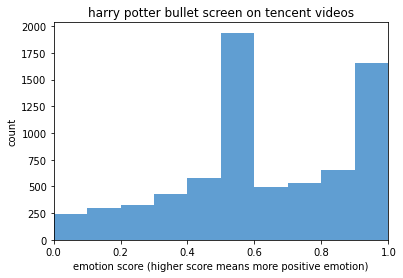

In [70]:
#  绘制情感分直方图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
 
bins = np.arange(0, 1.1, 0.1)
plt.hist(qq_df['emotion'], bins, color = '#4F94CD', alpha=0.9)
plt.xlim(0, 1)
plt.xlabel('emotion score (higher score means more positive emotion)')
plt.ylabel('count')
plt.title('harry potter bullet screen on tencent videos')
plt.show()

In [71]:
key_words = jieba.analyse.extract_tags(sentence=qq_all_danmu_text, topK=10, withWeight=True, allowPOS=())
key_words

[('哈利', 0.21729535219711327),
 ('2021', 0.17952469082534625),
 ('斯内普', 0.16011661614152503),
 ('哈哈哈', 0.10652297802353101),
 ('2021.11', 0.10492490375940845),
 ('罗恩', 0.10315319420483993),
 ('赫敏', 0.09461436408362843),
 ('2022', 0.09036884774654254),
 ('2021.10', 0.08309081974010958),
 ('哈利波特', 0.07217377773046015)]

In [72]:
df_bad=qq_df[qq_df['emotion']<0.2]
df_bad.head()

,contents,emotion
2786,2021 11 10,0.143037
34907,2021年6月14日我们散了,0.071082
8421,2048年重刷第十遍外面悬浮汽车的声音好大吵死了,0.031045
38219,有，我是2021.11.16晚上10点钟52看的,0.112953
33559,2021年12月11日17:39:10,0.042533


In [73]:
bad_text = ''
for i in df_bad['contents']:
    bad_text += i
# 消极评论关键词
# most frequent words in negative comments
key_words = jieba.analyse.extract_tags(sentence=bad_text, topK=100, withWeight=True, allowPOS=())
key_words

[('2021', 0.4425048269730149),
 ('2022', 0.2498011120008955),
 ('11', 0.19270371497211938),
 ('10', 0.18556654034352238),
 ('12', 0.13560631794334327),
 ('20', 0.07137174628597015),
 ('16', 0.06423457165737313),
 ('2020', 0.06423457165737313),
 ('扣分', 0.06051019874722389),
 ('打卡', 0.05870442860656716),
 ('厉害', 0.05787499351726568),
 ('麻瓜', 0.057097397028776115),
 ('23', 0.057097397028776115),
 ('鬼才', 0.052328304108895524),
 ('不是', 0.042988891177731345),
 ('宿管', 0.042823047771582086),
 ('29', 0.042823047771582086),
 ('格兰芬多', 0.042823047771582086),
 ('19', 0.042823047771582086),
 ('你们', 0.0423657924478209),
 ('罗恩', 0.04234472636525373),
 ('爆破', 0.04125605952511045),
 ('14', 0.035685873142985075),
 ('17', 0.035685873142985075),
 ('call', 0.035685873142985075),
 ('15', 0.035685873142985075),
 ('21', 0.035685873142985075),
 ('28', 0.035685873142985075),
 ('斯莱特林', 0.035685873142985075),
 ('22', 0.035685873142985075),
 ('为啥', 0.03414569855701493),
 ('哈利', 0.033037206889253726),
 ('有没有', 0.032

In [74]:
#接下来用刚才的消极词汇做搜索确认结果
qq_df[qq_df['contents'].str.contains("VIP")]

,contents,emotion
6567,我是VIP,0.250000
6568,你没有VIP特效,0.295844
22422,在下各位都是VIP吧,0.252313
7624,我是VIP[加油],0.895319
41146,VIP的弹幕颜色挺好看的,0.615833
39718,VIP们嚣张点,0.230828
6997,为什么我的VIP没有头,0.232081
42512,VIP的力量,0.850789
32222,VIP：还好,0.676072
10908,不是只有VIP能看吗,0.142404


In [75]:
qq_df[qq_df['contents'].str.contains("疫情")]

,contents,emotion
35755,2022疫情还在继续,0.522702
33651,2022年2月25日希望疫情结束，消失，世界和平,0.816544
4709,2022深圳又有疫情提前放假二刷来了,0.050099
492,2022.6.9疫情网课无聊死了,0.103911
32121,偷偷告诉你们2022年疫情还有,0.901834
4380,2022年3月27日因为疫情开始看哈利波特,0.954676
39545,20220506疫情还是很严重，哪里都去不了,0.646529
41564,2021.9.15福建莆田疫情,0.744827
15171,现在是2022年1月4日希望整个世界疫情结束,0.451274
4758,2020年会有一场史无前例的疫情,0.505351


In [76]:
qq_df[qq_df['contents'].str.contains("北京")]

,contents,emotion
21991,北京环球影城已打卡 一定要去,0.756944
48452,2021.10.1我在上班没有休假，在北京看完第一部。YSQ,0.913676
2591,2021.9.13北京，明天北京环球影城门票就要开售了,0.628294
4785,重温完了重温之后去北京环球影城,0.998965
3652,北京环球影城开了，重刷找找带入感,0.782942
440,有没有和我一样的 为了去北京环球影城 从第一部开始刷,0.382820
2893,2021.12. 2021.12 To北京,0.458279
14844,现在是北京时间2021年10月30日晚上22点07,0.046030
42152,北京,0.536885
34647,我在北京,0.536885
